c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      570 non-null    datetime64[ns]
 1   y       570 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.0 KB


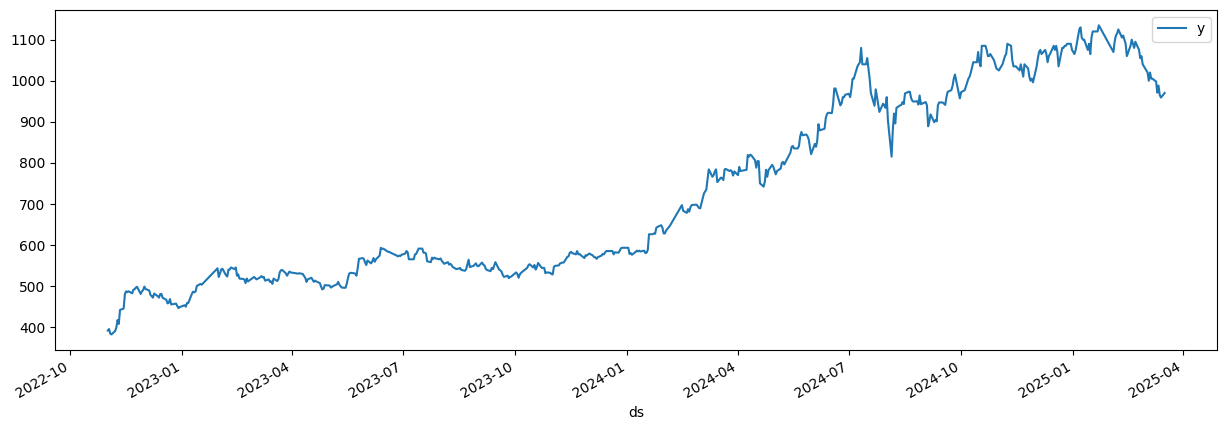

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level, set_random_seed
# set_log_level("ERROR")

df = pd.read_csv('data/stocks/2330_stock_data_0317.csv', parse_dates=['ds'])[['ds', 'y']]
plt = df.plot(x="ds", y="y", figsize=(15, 5))
df.info()

In [9]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
# set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet(
    # yearly_seasonality=True,
    weekly_seasonality=True,
)
m.set_plotting_backend("matplotlib")

df_train, df_val = m.split_df(df, valid_p=0.2)
print(f"validation: {df_val['ds'].iloc[0]} ~ {df_val['ds'].iloc[-1]}")
set_random_seed(0)
metrics = m.fit(df_train, validation_df=df_val)
metrics

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.14% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are disp

validation: 2024-09-20 00:00:00 ~ 2025-03-17 00:00:00
Epoch 150: 100%|██████████| 150/150 [02:42<00:00,  0.92it/s]    

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 150



Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (29) is too small than the required number                     for the learning rate finder (218). The results might not be optimal.
Finding best initial lr: 100%|██████████| 218/218 [00:00<00:00, 320.77it/s]


Training: |          | 0/? [00:14<?, ?it/s, v_num=2963, MAE_val=59.70, RMSE_val=84.40, Loss_val=0.0343, RegLoss_val=0.000, train_loss=0.00464, reg_loss=0.000, MAE=21.30, RMSE=31.20, Loss=0.00464, RegLoss=0.000]


,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,460.525909,512.071472,0.654913,0.0,0,0.532269,0.0,487.172913,538.521423,0.530134,0.0
1,332.141266,371.938599,0.437605,0.0,1,0.393077,0.0,380.520905,428.147491,0.392128,0.0
2,223.632568,267.670166,0.253948,0.0,2,0.264287,0.0,284.994263,324.042755,0.266114,0.0
3,145.639633,215.005783,0.156314,0.0,3,0.154958,0.0,190.866241,231.325500,0.152642,0.0
4,100.644516,143.448059,0.089157,0.0,4,0.077656,0.0,121.925224,154.549103,0.076955,0.0
...,...,...,...,...,...,...,...,...,...,...,...
145,59.422127,84.165367,0.034098,0.0,145,0.004631,0.0,21.206642,30.112555,0.004570,0.0
146,60.412380,85.076019,0.034809,0.0,146,0.004640,0.0,21.486996,30.497307,0.004630,0.0
147,59.705254,84.394272,0.034277,0.0,147,0.004633,0.0,21.386660,30.864086,0.004614,0.0
148,59.509338,84.157211,0.034092,0.0,148,0.004635,0.0,21.309650,30.721327,0.004610,0.0


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.14% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed i

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 332.80it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_forecast_matplotlib.py:84: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



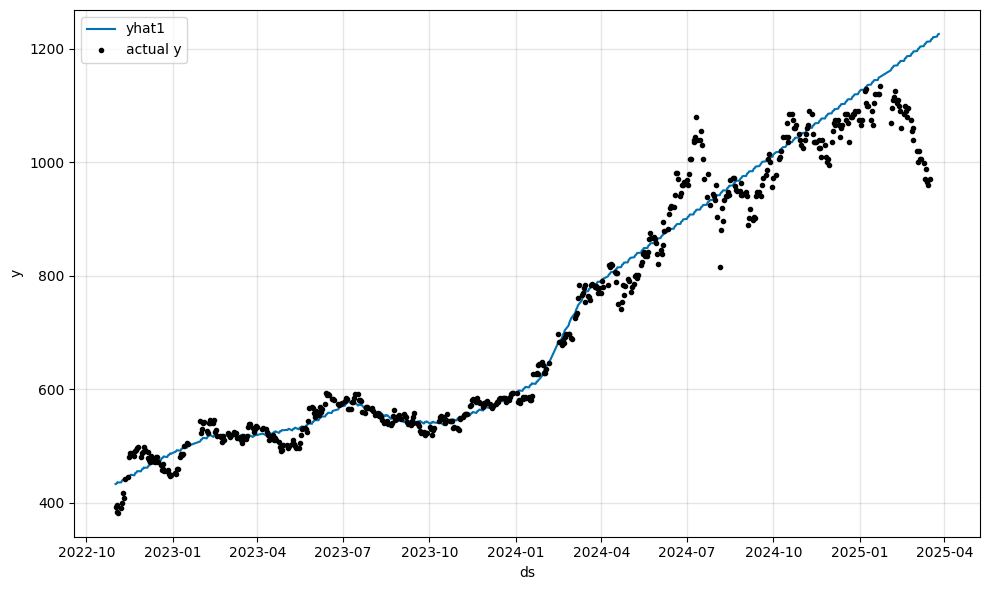

In [10]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=7)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

In [11]:
from src.model.utils import val_mape

print(f"MAPE={val_mape(df_val, forecast) * 100:.2f}%")

MAPE=5.77%


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_model_parameters_matplotlib.py:636: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  days_i = pd.date_range(start="2017-01-01", periods=week_days * 24, freq="H") + pd.Timedelta(days=weekly_start)



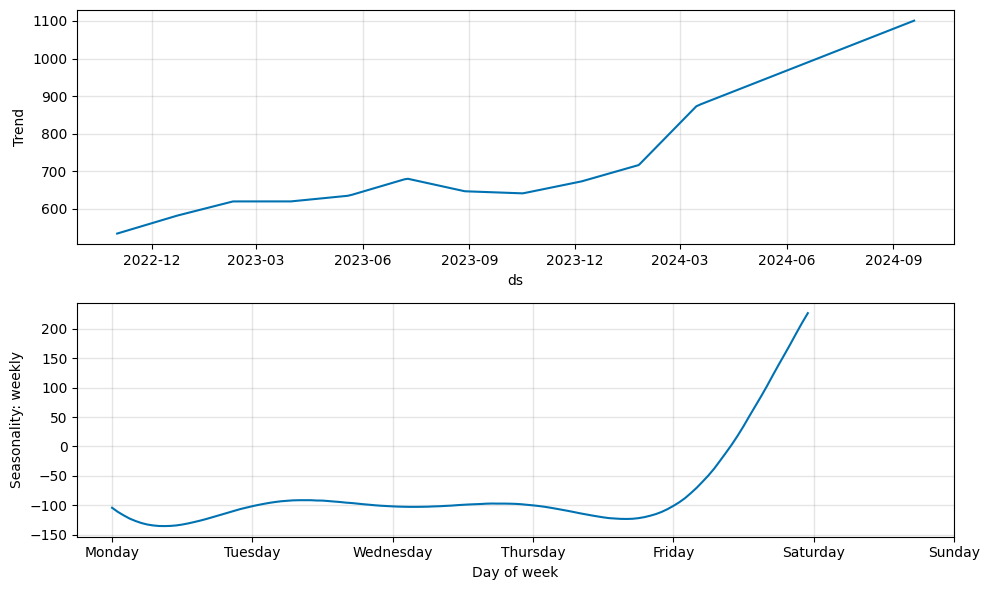

In [12]:
m.plot_parameters(components=["trend", "seasonality"])

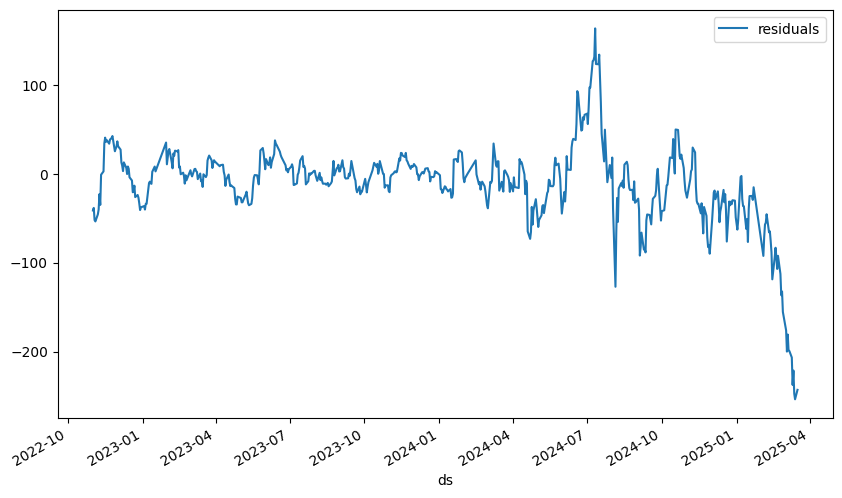

In [13]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

In [14]:
df_residuals_train = df_residuals.dropna()[df_residuals['ds'].dropna().isin(df_train['ds'])]
df_residuals_train

,ds,residuals
0,2022-11-01,-41.172150
1,2022-11-02,-38.247284
2,2022-11-03,-51.932465
3,2022-11-04,-53.452850
4,2022-11-07,-45.609863
...,...,...
451,2024-09-12,-52.318542
452,2024-09-13,-45.624146
453,2024-09-16,-46.161804
454,2024-09-18,-56.792542


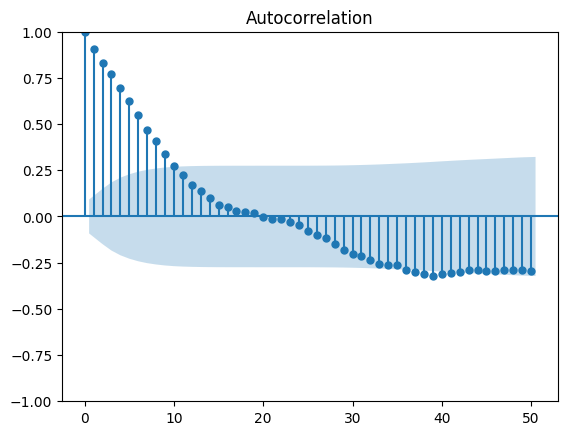

In [15]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

p = plot_acf(df_residuals_train['residuals'], lags=50)